In [ ]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mieszkania = pd.read_csv("rynek_pierwotny_ceny_ofertowe.csv") 
mieszkania.head()

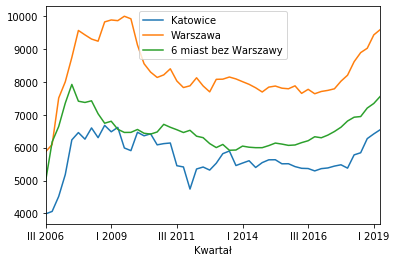

In [3]:
mieszkania.plot(x='Kwartał', y=['Katowice','Warszawa','6 miast bez Warszawy'])
plt.show()

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt


In [5]:
fp = "Powiaty/Powiaty.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head(1)

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,POW,1815,powiat ropczycko-sÄdziszowski,None,13415,2012-09-26,None,2012-09-26,None,None,...,1815,None,None,UZG,0,829084,None,1.776163,0.068825,"POLYGON ((21.69429 50.17849, 21.69440 50.17849..."


# Mieszkania niezamieszkane w zasobie gminy - pustostany

In [6]:
mieszkania_puste = pd.read_csv("mieszkania niezamieszkane w zasobie gminy pustostany.csv", sep=';') 
mieszkania_puste=mieszkania_puste.iloc[:,0:5]
mieszkania_puste=mieszkania_puste[mieszkania_puste['Rok']==2018][['Kod','Nazwa','Wartosc']]
mieszkania_puste['Kod']=mieszkania_puste['Kod'].astype(str).str.slice(0,4)
mieszkania_puste.head()

,Kod,Nazwa,Wartosc
3,2010,Powiat bolesławiecki,65
7,2020,Powiat dzierżoniowski,117
11,2030,Powiat głogowski,54
15,2040,Powiat górowski,17
19,2050,Powiat jaworski,32


In [7]:
downgradeKodow = pd.read_csv("downgradeKodow.csv", sep=',', dtype=object) 
mieszkania_puste = mieszkania_puste.merge(downgradeKodow, how='inner', left_on="Kod", right_on="Kod" )

In [8]:
mieszkania_puste=mieszkania_puste[['Nazwa','Wartosc','JPT_KOD_JE']]
mieszkania_puste.head(n=1)

,Nazwa,Wartosc,JPT_KOD_JE
0,Powiat bolesławiecki,65,2010


In [9]:
merged = map_df.merge(mieszkania_puste, how='inner', left_on="JPT_KOD_JE", right_on="JPT_KOD_JE")

In [10]:
#merged[['Wartosc2']]=(merged[['Wartosc']]-merged[['Wartosc']].mean())/merged[['Wartosc']].std()
#merged[['Wartosc2']]=(merged[['Wartosc']]-merged[['Wartosc']].min())/(merged[['Wartosc']].max()-merged[['Wartosc']].min())
#merged[['Kod', 'Nazwa', 'Wartosc', 'Wartosc2']]

In [11]:
#merged[['JPT_KOD_JE','JPT_NAZWA_', 'Nazwa', 'Wartosc']].to_csv('/home/cengu/Dokumenty/skryptyPython/ceny-mieszkan/merged2.csv')

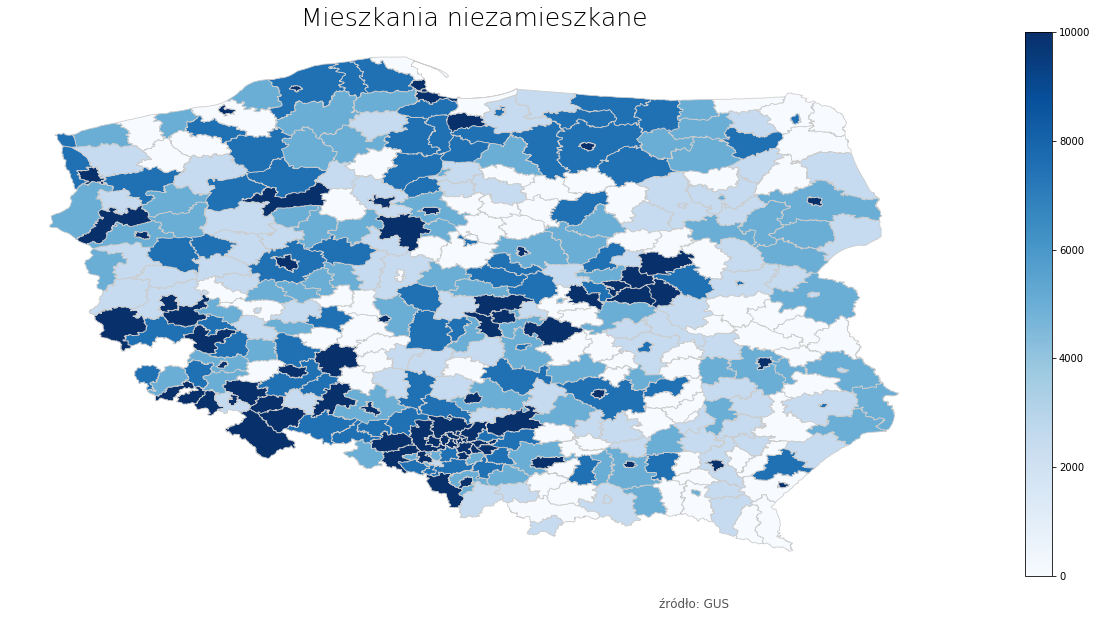

In [33]:
# set the value column that will be visualised
#variable = 'Wartosc2'# set the range for the choropleth values
#vmin, vmax = 0, 1#reate figure and axes for Matplotlib
variable = 'Wartosc'# set the range for the choropleth values
vmin, vmax = 0, 10000#reate figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Mieszkania niezamieszkane', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('źródło: GUS', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', scheme='quantiles', legend=False)

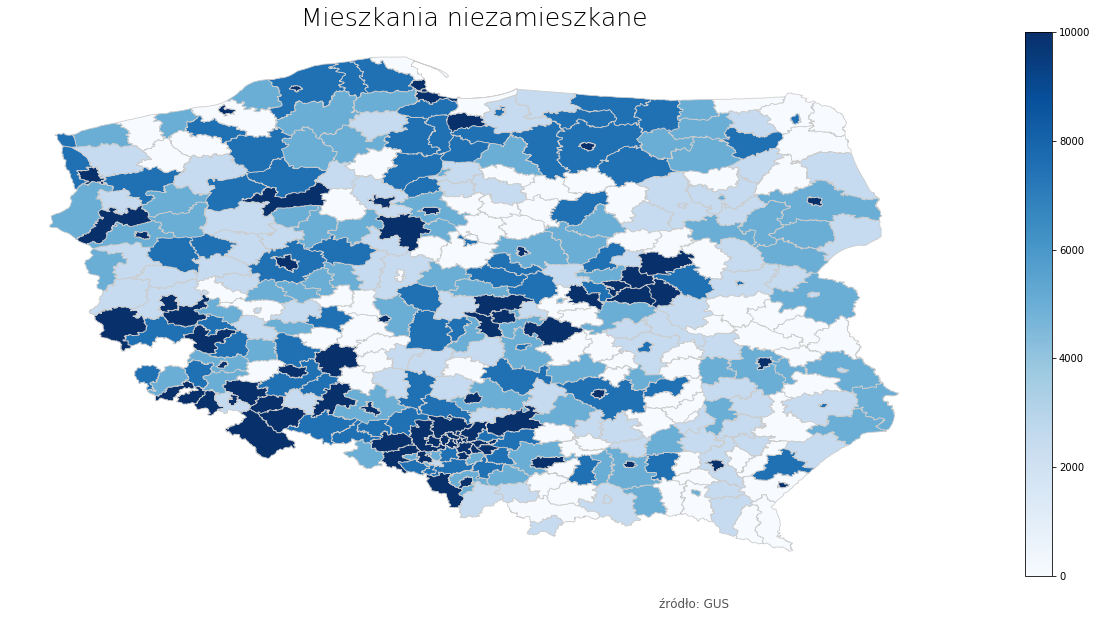

In [27]:
# set the value column that will be visualised
#variable = 'Wartosc2'# set the range for the choropleth values
#vmin, vmax = 0, 1#reate figure and axes for Matplotlib
variable = 'Wartosc'# set the range for the choropleth values
vmin, vmax = 0, 10000#reate figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Mieszkania niezamieszkane', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('źródło: GUS', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', scheme='quantiles', legend=False)

In [13]:
#merged=merged[merged['Wartosc']>0.00]

In [14]:
#df.loc[df[<some_column_name>] == <condition>, [<another_column_name>]] = <value_to_add>
#merged4.loc[merged4['Kod']!='1465',['Wartosc']]=7000.00
#merged4.loc[merged4['Kod']=='1465',['Wartosc']]=3000.00
#merged4=merged4[merged4['Wartosc']>0.00]

In [15]:
df = pd.DataFrame(data=merged)
df[['JPT_KOD_JE', 'Nazwa', 'Wartosc']].sort_values(['Wartosc'], ascending=False).head(n=6)

,JPT_KOD_JE,Nazwa,Wartosc
303,1465,Powiat m. st. Warszawa,9204
110,1061,Powiat m.Łódź,7552
32,0264,Powiat m.Wrocław,1984
58,1008,Powiat pabianicki,1959
148,2469,Powiat m.Katowice,1785
90,2462,Powiat m.Bytom,1740


In [16]:
df[['JPT_KOD_JE', 'Nazwa', 'Wartosc']].sort_values(['Wartosc'], ascending=False).tail(n=6)

,JPT_KOD_JE,Nazwa,Wartosc
373,0412,Powiat rypiński,2
287,1424,Powiat pułtuski,2
216,1436,Powiat zwoleński,2
82,2610,Powiat skarżyski,1
83,2610,Powiat skarżyski,1
165,1423,Powiat przysuski,1


# Budynki mieszkalne w gminie

In [17]:
mieszkania_gmina = pd.read_csv("budynki mieszkalne w gminie.csv", sep=';') 
mieszkania_gmina=mieszkania_gmina.iloc[:,0:5]
mieszkania_gmina=mieszkania_gmina[mieszkania_gmina['Rok']==2018][['Kod','Nazwa','Wartosc']]
mieszkania_gmina['Kod']=mieszkania_gmina['Kod'].astype(str).str.slice(0,4)

In [18]:
mieszkania_gmina = mieszkania_gmina.merge(downgradeKodow, how='inner', left_on="Kod", right_on="Kod" )

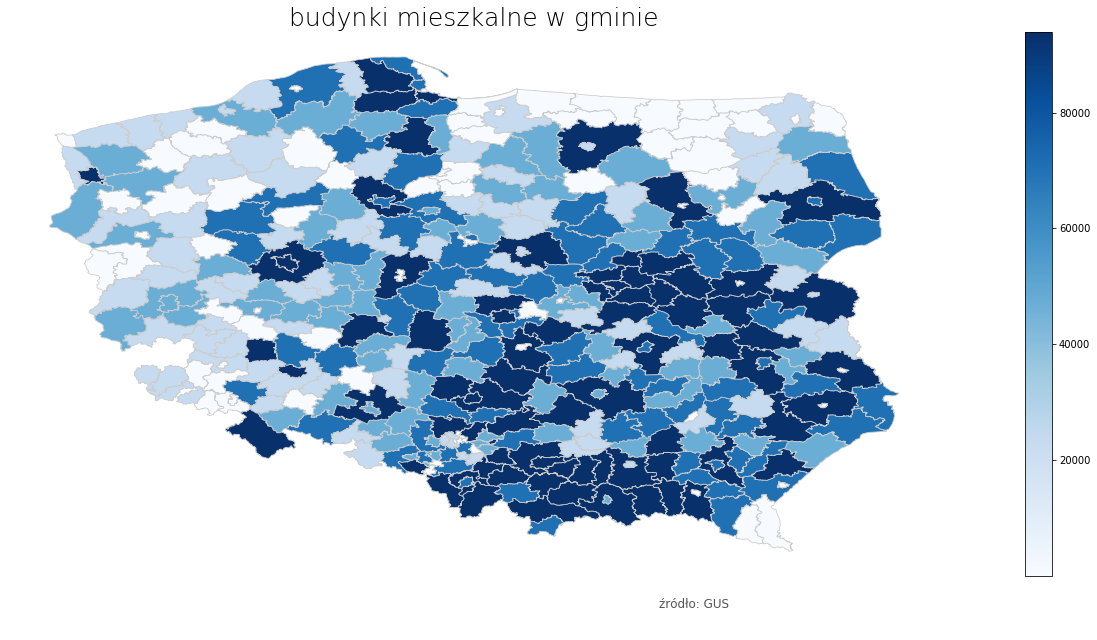

In [19]:
merged2 = map_df.merge(mieszkania_gmina, how='inner', left_on="JPT_KOD_JE", right_on="JPT_KOD_JE")
# set the value column that will be visualised
variable = 'Wartosc'# set the range for the choropleth values
vmin, vmax = 1, 93888#reate figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('budynki mieszkalne w gminie', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('źródło: GUS', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
merged2.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', scheme='quantiles')

In [20]:
df2 = pd.DataFrame(data=merged2)
df2[['JPT_KOD_JE', 'Nazwa', 'Wartosc']].sort_values(['Wartosc'], ascending=False).head(n=6)

,JPT_KOD_JE,Nazwa,Wartosc
303,1465,Powiat m. st. Warszawa,93888.0
384,3021,Powiat poznański,85739.0
130,1206,Powiat krakowski,76484.0
306,2604,Powiat kielecki,56021.0
329,1434,Powiat wołomiński,53362.0
293,1216,Powiat tarnowski,52930.0


In [21]:
df2[['JPT_KOD_JE', 'Nazwa', 'Wartosc']][df2['Wartosc']>0].sort_values(['Wartosc'], ascending=False).tail(n=6)


,JPT_KOD_JE,Nazwa,Wartosc
200,1801,Powiat bieszczadzki,3800.0
205,2818,Powiat gołdapski,3787.0
87,2474,Powiat m.Siemianowice Śląskie,3169.0
56,3263,Powiat m.Świnoujście,3002.0
206,2264,Powiat m.Sopot,2784.0
360,2476,Powiat m.Świętochłowice,2229.0


# Wykonane eksmisje z powodu zaległości w opłatach

In [22]:
mieszkania_eksmisje = pd.read_csv("wykonane eksmisje z powodu zaległości w opłatach.csv", sep=';') 
mieszkania_eksmisje=mieszkania_eksmisje.iloc[:,0:6]
mieszkania_eksmisje=mieszkania_eksmisje[mieszkania_eksmisje['Rok']==2018][['Kod','Nazwa','Wartosc']]
mieszkania_eksmisje['Kod']=mieszkania_eksmisje['Kod'].astype(str).str.slice(0,4)
mieszkania_eksmisje = mieszkania_eksmisje.merge(downgradeKodow, how='inner', left_on="Kod", right_on="Kod" )

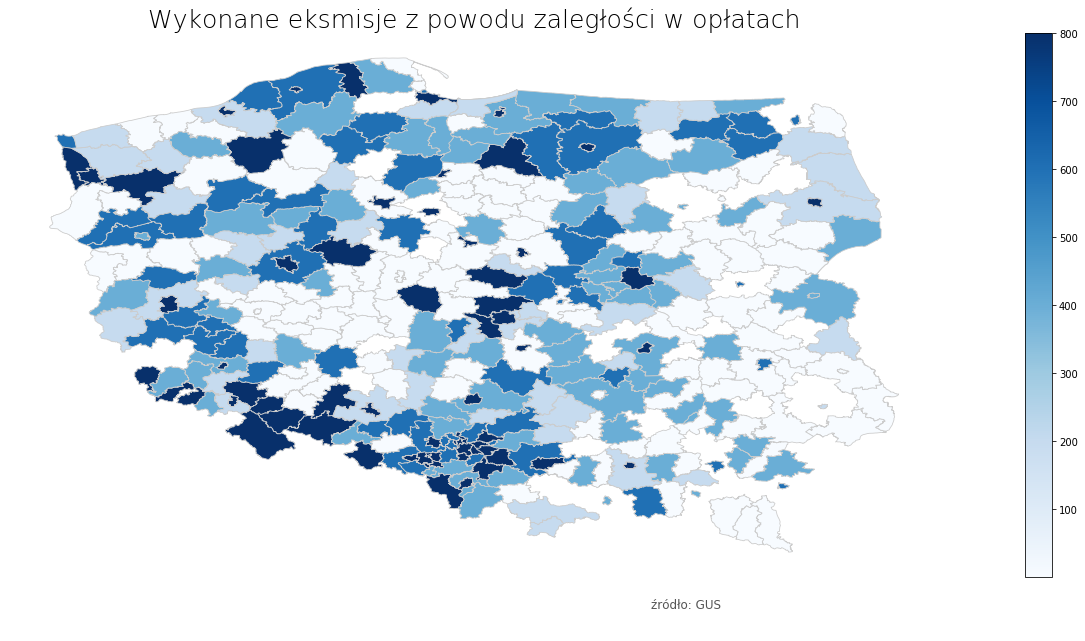

In [23]:
merged3 = map_df.merge(mieszkania_eksmisje, how='inner', left_on="JPT_KOD_JE", right_on="JPT_KOD_JE")
# set the value column that will be visualised
variable = 'Wartosc'# set the range for the choropleth values
vmin, vmax = 1, 800#reate figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Wykonane eksmisje z powodu zaległości w opłatach', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('źródło: GUS', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
merged3.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', scheme='quantiles')

In [24]:
df3 = pd.DataFrame(data=merged3)
df3[['JPT_KOD_JE', 'Nazwa', 'Wartosc']].sort_values(['Wartosc'], ascending=False).head(n=6)

,JPT_KOD_JE,Nazwa,Wartosc
279,1465,Powiat m. st. Warszawa,781.0
102,1061,Powiat m.Łódź,150.0
341,0461,Powiat m.Bydgoszcz,142.0
144,3262,Powiat m.Szczecin,114.0
136,2463,Powiat m.Chorzów,82.0
137,2469,Powiat m.Katowice,67.0


In [25]:
df3[['JPT_KOD_JE', 'Nazwa', 'Wartosc']][df3['Wartosc']>0].sort_values(['Wartosc'], ascending=False).tail(n=5)

,JPT_KOD_JE,Nazwa,Wartosc
196,1819,Powiat strzyżowski,1.0
303,0809,Powiat zielonogórski,1.0
306,3204,Powiat goleniowski,1.0
62,0619,Powiat włodawski,1.0
166,3024,Powiat szamotulski,1.0
